In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.seasonal import seasonal_decompose

In [2]:
df = pd.read_csv('META.csv')
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True)
df

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-09-28,259.399994,259.600006,254.820007,256.820007,256.547821,18826300
2020-09-29,257.809998,263.329987,256.899994,261.790009,261.512543,20200200
2020-09-30,261.980011,266.079987,260.100006,261.899994,261.622406,20142500
2020-10-01,265.350006,268.329987,264.799988,266.630005,266.347412,20009800
2020-10-02,261.209991,265.149994,259.179993,259.940002,259.664490,16367600
...,...,...,...,...,...,...
2024-03-11,497.010010,497.320007,476.000000,483.589996,483.589996,20428300
2024-03-12,493.260010,502.309998,484.730011,499.750000,499.750000,15448200
2024-03-13,495.390015,500.980011,491.029999,495.570007,495.570007,12090700


## Series Plot

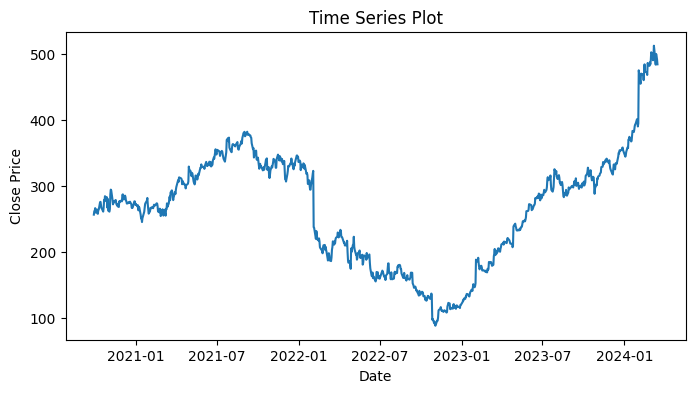

In [10]:
# Plot the time series
plt.figure(figsize=(8, 4))
plt.plot(df['Close'])
plt.title('Time Series Plot')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.show()

## Trend, Seasonality, Residual Plot

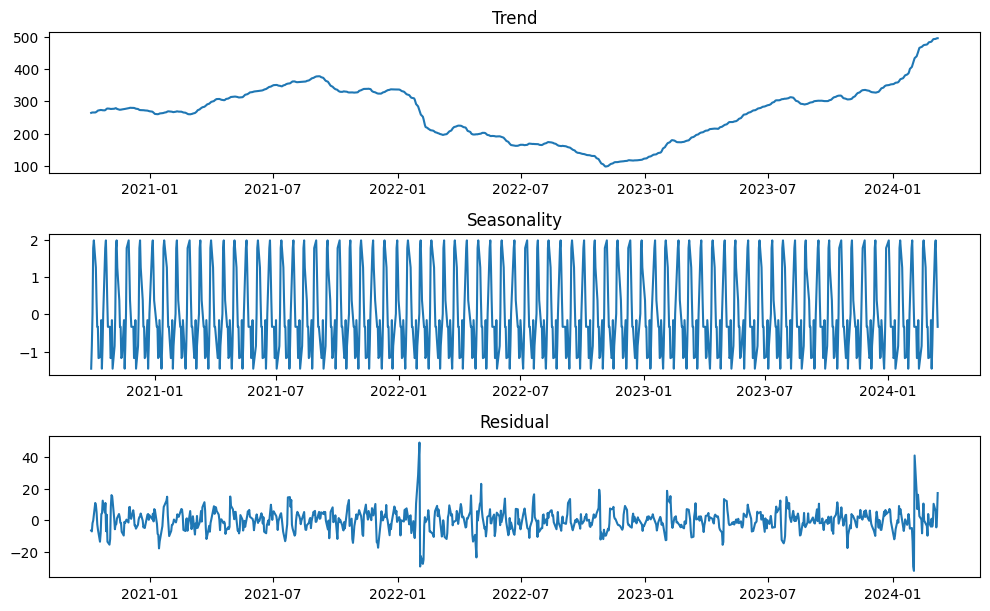

In [8]:
# Decompose the time series into trend, seasonality, and residual components
decomposition = seasonal_decompose(df['Close'], model='additive', period=12)
trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

# Plot the trend, seasonality, and residual components
plt.figure(figsize=(10, 8))
plt.subplot(411)
plt.plot(trend)
plt.title('Trend')
plt.subplot(412)
plt.plot(seasonal)
plt.title('Seasonality')
plt.subplot(413)
plt.plot(residual)
plt.title('Residual')
plt.tight_layout()
plt.show()

## ACF and PACF

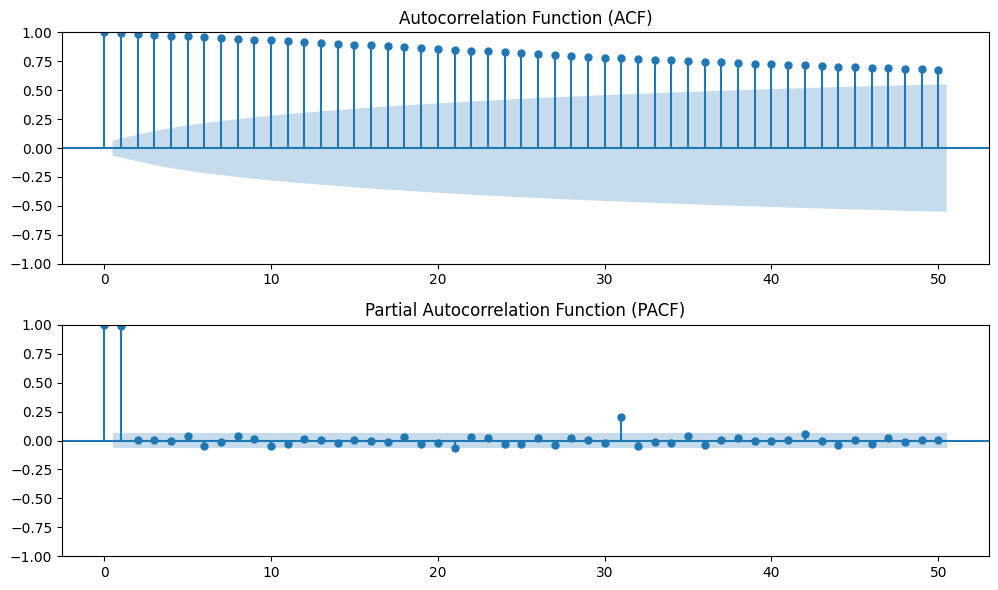

In [3]:
# Plot the ACF and PACF
plt.figure(figsize=(10, 6))
plot_acf(df['Close'], lags=50, ax=plt.subplot(211))
plt.title('Autocorrelation Function (ACF)')
plot_pacf(df['Close'], lags=50, ax=plt.subplot(212))
plt.title('Partial Autocorrelation Function (PACF)')
plt.tight_layout()
plt.show()

## Cycle Plot

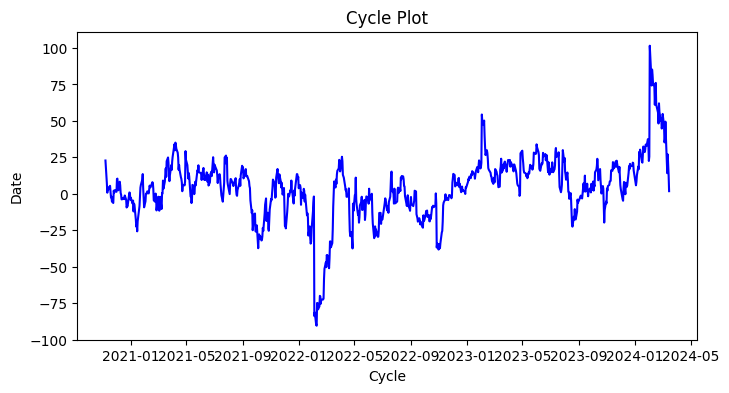

In [11]:
plt.figure(figsize=(8,4))
cycle = df['Close'] - df['Close'].rolling(window=30).mean()
plt.plot(cycle, color='blue')
plt.title('Cycle Plot')
plt.xlabel('Cycle')
plt.ylabel('Date')
plt.show()

## Box Plot

In [ ]:
plt.figure(figsize=(12,4))
df.boxplot()
plt.title('Boxplot')
plt.xlabel('Attributes')
plt.ylabel('Values')
plt.show()